In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
from collections import Counter
import seaborn as sns

train = pd.read_csv('./input/noh.csv')
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,F,47,0,P/M,100,27,27,72,72,3.48,8,8,42,1
1,F,47,0,P/M,94,30,30,81,81,4.16,2,2,78,1
2,F,47,0,P/M,94,30,30,81,81,4.16,6,5,92,1
3,F,37,0,P/M,94,7,7,18,18,3.67,2,2,21,1
4,F,48,2,P/M,77,13,13,36,36,1.67,3,0,0,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       414 non-null    object 
 1   B       414 non-null    int64  
 2   C       414 non-null    int64  
 3   D       414 non-null    object 
 4   E       414 non-null    int64  
 5   F       414 non-null    int64  
 6   G       414 non-null    int64  
 7   H       414 non-null    int64  
 8   I       414 non-null    int64  
 9   J       414 non-null    float64
 10  K       414 non-null    int64  
 11  L       414 non-null    int64  
 12  M       414 non-null    int64  
 13  N       414 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 45.4+ KB


In [3]:
train.describe()

,B,C,E,F,G,H,I,J,K,L,M,N
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,41.958937,0.299517,69.446860,14.862319,14.867150,39.577295,41.850242,2.867367,2.374396,1.403382,28.500000,1.130435
std,9.998099,0.750883,42.131879,8.679266,8.153743,24.945220,24.263421,1.273766,2.105549,1.684307,52.839689,0.464102
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,7.000000,8.000000,18.000000,21.000000,2.390000,0.000000,0.000000,0.000000,1.000000
50%,43.000000,0.000000,93.000000,13.000000,13.000000,36.000000,36.000000,3.240000,2.000000,1.000000,3.500000,1.000000
75%,48.000000,0.000000,100.000000,24.000000,22.750000,69.000000,66.000000,3.690000,4.000000,2.000000,38.750000,1.000000
max,73.000000,6.000000,100.000000,64.000000,63.000000,97.000000,228.000000,4.500000,8.000000,8.000000,434.000000,2.000000


In [4]:
for label, content in train.items():
    print("%s:" % label, train[label].unique())

A: ['F' 'M']
B: [47 37 48 52 56 38 41 43 45 34 53 44 22 49 33 25 40 20 18 54 21 30 46 35
 51 39 27 28 50 69 36 31 42 23 55 24 32 60 29 26 58 62 57 59 67 64 68 66
 63 70 73]
C: [0 2 1 3 4 6 5]
D: ['P/M' 'P' 'N' 'M']
E: [100  94  77  93  88  91  90  11   0  95  75   7  92  79  65  40  97  47
  89  37  96  99  86  87  36  42   1  62  98  78  70  64  66  41  31]
F: [27 30  7 13 25 19  9 23  6  3 20 11 35 24 14 22 15 17 12  5  8 31 26 21
 18 16 28  0  4 64]
G: [27 30  7 13 18 12  9 25 23  0 20 11 21  8 14 15  5  6 24 26 19 16 28 22
 10  4 17 63]
H: [72 81 18 36 69 54 24 71 66 78  9 31 97 52 53 63 57 51 33 39 44 35 12 21
 59 37 45 70 90 55 15  0 42 34 87]
I: [ 72  81  18  36  51  24  71  66  78   0  54  31  59  52  53  21  57  33
  39  35  12  69  60  37  45  70  17  15  11  16  26  32  43  82  42  30
  34  48 228  87]
J: [3.48 4.16 3.67 1.67 3.24 3.33 3.25 4.   3.29 3.17 3.   3.5  2.31 2.96
 3.42 3.45 3.6  3.07 0.   3.2  1.98 4.35 2.38 3.64 3.58 2.71 2.92 4.12
 3.31 2.77 2.55 3.01 3.73 2.59

In [5]:
gender_list = []
gender_labels = ['M', 'F']
for i in range(len(train)):
    gender_list.append(gender_labels.index(train['A'][i]))

train['A'] = gender_list
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,47,0,P/M,100,27,27,72,72,3.48,8,8,42,1
1,1,47,0,P/M,94,30,30,81,81,4.16,2,2,78,1
2,1,47,0,P/M,94,30,30,81,81,4.16,6,5,92,1
3,1,37,0,P/M,94,7,7,18,18,3.67,2,2,21,1
4,1,48,2,P/M,77,13,13,36,36,1.67,3,0,0,1


In [6]:
count_list = []
count_labels = ['P', 'M', 'P/M', 'N']

for i in range(len(train)):
    count_list.append(count_labels.index(train['D'][i]))

train['D'] = count_list
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,47,0,2,100,27,27,72,72,3.48,8,8,42,1
1,1,47,0,2,94,30,30,81,81,4.16,2,2,78,1
2,1,47,0,2,94,30,30,81,81,4.16,6,5,92,1
3,1,37,0,2,94,7,7,18,18,3.67,2,2,21,1
4,1,48,2,2,77,13,13,36,36,1.67,3,0,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       414 non-null    int64  
 1   B       414 non-null    int64  
 2   C       414 non-null    int64  
 3   D       414 non-null    int64  
 4   E       414 non-null    int64  
 5   F       414 non-null    int64  
 6   G       414 non-null    int64  
 7   H       414 non-null    int64  
 8   I       414 non-null    int64  
 9   J       414 non-null    float64
 10  K       414 non-null    int64  
 11  L       414 non-null    int64  
 12  M       414 non-null    int64  
 13  N       414 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


In [8]:
for label, content in train.items():
    print("%s:" % label, train[label].unique())

A: [1 0]
B: [47 37 48 52 56 38 41 43 45 34 53 44 22 49 33 25 40 20 18 54 21 30 46 35
 51 39 27 28 50 69 36 31 42 23 55 24 32 60 29 26 58 62 57 59 67 64 68 66
 63 70 73]
C: [0 2 1 3 4 6 5]
D: [2 0 3 1]
E: [100  94  77  93  88  91  90  11   0  95  75   7  92  79  65  40  97  47
  89  37  96  99  86  87  36  42   1  62  98  78  70  64  66  41  31]
F: [27 30  7 13 25 19  9 23  6  3 20 11 35 24 14 22 15 17 12  5  8 31 26 21
 18 16 28  0  4 64]
G: [27 30  7 13 18 12  9 25 23  0 20 11 21  8 14 15  5  6 24 26 19 16 28 22
 10  4 17 63]
H: [72 81 18 36 69 54 24 71 66 78  9 31 97 52 53 63 57 51 33 39 44 35 12 21
 59 37 45 70 90 55 15  0 42 34 87]
I: [ 72  81  18  36  51  24  71  66  78   0  54  31  59  52  53  21  57  33
  39  35  12  69  60  37  45  70  17  15  11  16  26  32  43  82  42  30
  34  48 228  87]
J: [3.48 4.16 3.67 1.67 3.24 3.33 3.25 4.   3.29 3.17 3.   3.5  2.31 2.96
 3.42 3.45 3.6  3.07 0.   3.2  1.98 4.35 2.38 3.64 3.58 2.71 2.92 4.12
 3.31 2.77 2.55 3.01 3.73 2.59 1.28 3.39 3.9

In [9]:
len(train)

414

In [10]:
train.groupby(['N']).size()

N
0     21
1    318
2     75
dtype: int64

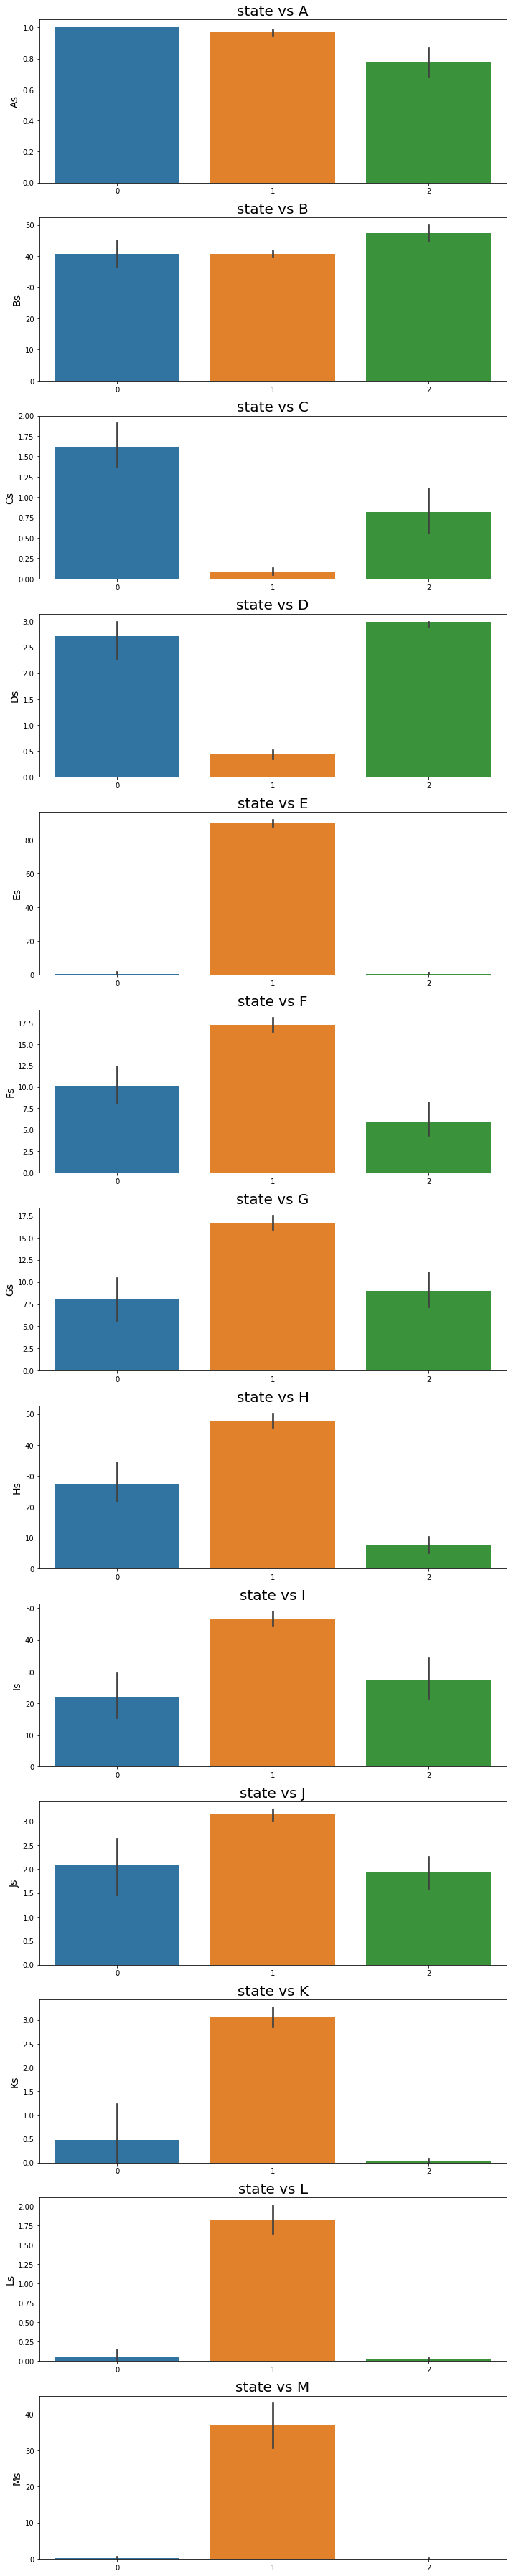

In [11]:
labels_list = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M']

fig, ax = plt.subplots(13, 1, figsize=(10, 50))

r = 0
for label in labels_list:
    df1 = train.sort_values("N")
    sns.barplot(x="N", y=label, data=df1, ax=ax[r])
    ax[r].set_xlabel('', fontsize=16)
    ax[r].set_ylabel('%ss' % label, fontsize=14)
    ax[r].set_title("state vs %s"% label, fontsize=20)
    r += 1

fig.tight_layout()
plt.show()




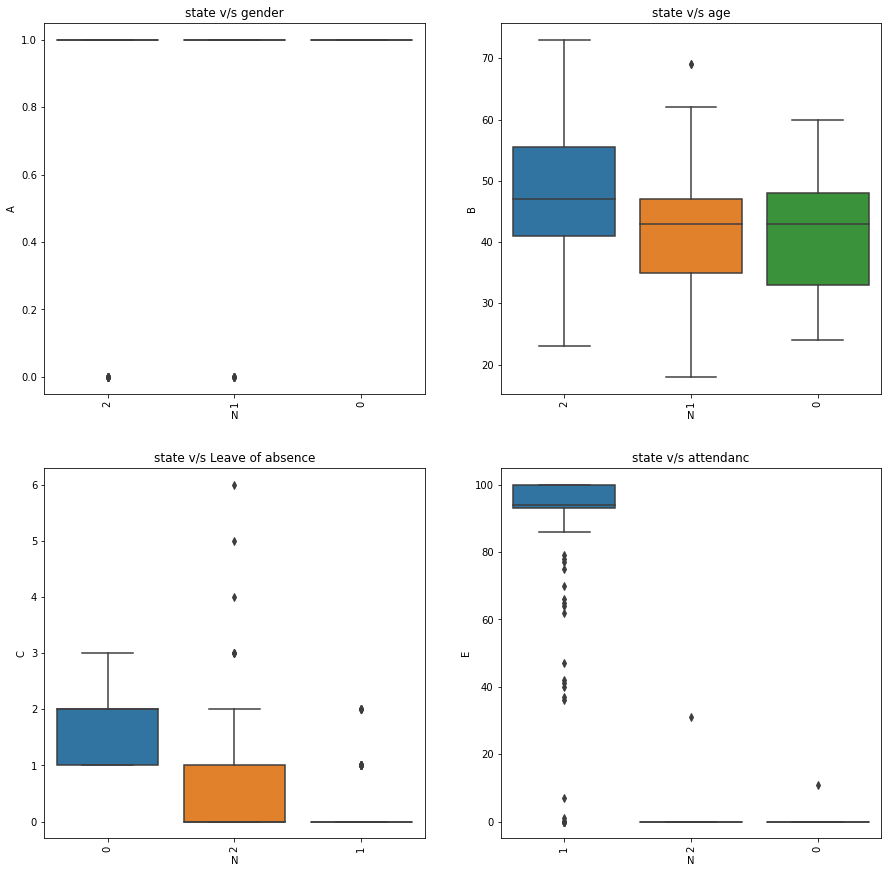

In [12]:
plt.figure(figsize= (15,15))
plt.subplot(2,2,1)
order_by = train.groupby('N')['A'].median().sort_values(ascending = False).index
sns.boxplot(x = train['N'], y = train['A'],order = order_by)
plt.xticks(rotation = 90)
plt.title('state v/s gender')

plt.subplot(2,2,2)
order_by = train.groupby('N')['B'].median().sort_values(ascending = False).index
sns.boxplot(x = train['N'], y = train['B'],order = order_by)
plt.xticks(rotation = 90)
plt.title('state v/s age')

plt.subplot(2,2,3)
order_by = train.groupby('N')['C'].median().sort_values(ascending = False).index
sns.boxplot(x = train['N'], y = train['C'],order = order_by)
plt.xticks(rotation = 90)
plt.title('state v/s Leave of absence')

plt.subplot(2,2,4)
order_by = train.groupby('N')['E'].median().sort_values(ascending = False).index
sns.boxplot(x = train['N'], y = train['E'],order = order_by)
plt.xticks(rotation = 90)
plt.title('state v/s attendanc')


plt.show()

In [13]:
y = train['N'].values
x = train.drop(['N'], axis=1)
x = x.values

x = (x - x.min()) / (x.max() - x.min())

Class=1, n=318 (76.812%)
Class=0, n=21 (5.072%)
Class=2, n=75 (18.116%)


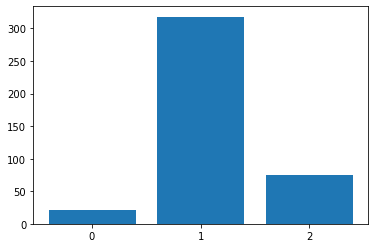

In [14]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    plt.xticks([0,1,2])
    pyplot.show()
    

count_and_plot(y)

Class=0, n=21 (33.333%)
Class=1, n=21 (33.333%)
Class=2, n=21 (33.333%)


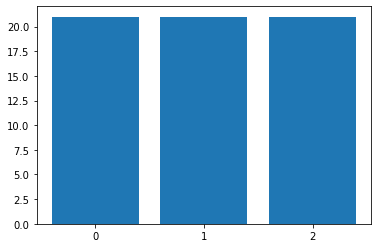

In [15]:
from imblearn.under_sampling import RandomUnderSampler
re_x, re_y = RandomUnderSampler(random_state=0).fit_resample(x, y)
count_and_plot(re_y)

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,shuffle = True, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [17]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=32, activation='relu', input_shape=x_train[0].shape),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=8, activation='relu'),
     tf.keras.layers.Dense(units=3, activation='softmax') ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 1,139
Trainable params: 1,139
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    batch_size=10,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Train on 264 samples, validate on 67 samples
Epoch 1/1000
264/264 [==============================] - 0s 1ms/sample - loss: 1.0701 - acc: 0.6288 - val_loss: 1.0275 - val_acc: 0.7463
Epoch 2/1000
264/264 [==============================] - 0s 223us/sample - loss: 0.9859 - acc: 0.7500 - val_loss: 0.9520 - val_acc: 0.7463
Epoch 3/1000
264/264 [==============================] - 0s 212us/sample - loss: 0.8967 - acc: 0.7500 - val_loss: 0.8582 - val_acc: 0.7463
Epoch 4/1000
264/264 [==============================] - 0s 212us/sample - loss: 0.7936 - acc: 0.7500 - val_loss: 0.7591 - val_acc: 0.7463
Epoch 5/1000
264/264 [==============================] - 0s 212us/sample - loss: 0.6942 - acc: 0.7500 - val_loss: 0.6731 - val_acc: 0.7463
Epoch 6/1000
264/264 [==============================] - 0s 219us/sample - loss: 0.6179 - acc: 0.7500 - val_loss: 0.6151 - val_acc: 0.7463
Epoch 7/1000
264/264 [==============================] - 0s 196us/sample - loss: 0.5597 - acc: 0.7500 - val_loss: 0.5618 - val_acc

In [20]:
#Save Model
model.save('D:/deep-learning/model/noh.h5')
model.save_weights('D:/deep-learning/model/noh.h5')


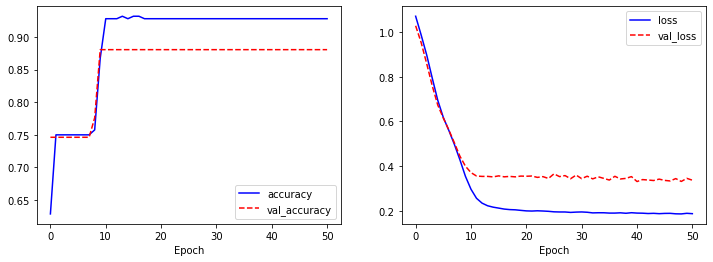

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], 'b-', label='accuracy')
plt.plot(history.history['val_acc'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

#plt.ylim(0, 1)
plt.legend()

plt.show()

In [22]:
model.evaluate(x_test, y_test)

83/83 [==============================] - 0s 72us/sample - loss: 0.2671 - acc: 0.9036


[0.2671354219137904, 0.90361446]

In [26]:
print(x_test[0:10])

[[0.00230415 0.12672811 0.         0.00230415 0.21428571 0.05990783
  0.05990783 0.16589862 0.16589862 0.0059447  0.01152074 0.00921659
  0.11059908]
 [0.         0.11981567 0.00460829 0.00691244 0.         0.03225806
  0.02995392 0.         0.09677419 0.00158986 0.         0.
  0.        ]
 [0.00230415 0.09447005 0.         0.00230415 0.21658986 0.03225806
  0.03225806 0.08986175 0.08986175 0.00778802 0.00460829 0.00460829
  0.07603687]
 [0.00230415 0.11290323 0.         0.00230415 0.20967742 0.05760369
  0.05760369 0.16589862 0.16589862 0.00788018 0.00691244 0.00691244
  0.06682028]
 [0.00230415 0.10599078 0.         0.00230415 0.23041475 0.02995392
  0.02995392 0.08294931 0.08294931 0.00691244 0.00921659 0.00460829
  0.        ]
 [0.00230415 0.11059908 0.         0.         0.23041475 0.04608295
  0.04608295 0.12442396 0.12442396 0.00737327 0.01152074 0.00921659
  0.02304147]
 [0.00230415 0.10599078 0.00230415 0.00691244 0.         0.01612903
  0.01612903 0.04147465 0.04147465 0.009

In [27]:
print(y_test[0:10])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [28]:
print(model.predict(x_test[0:10]))

[[3.4094229e-04 9.9957985e-01 7.9207828e-05]
 [1.5675111e-01 2.3694517e-02 8.1955439e-01]
 [1.2833161e-03 9.9832493e-01 3.9178960e-04]
 [6.9046591e-04 9.9912399e-01 1.8550988e-04]
 [2.5126413e-03 9.9660623e-01 8.8121364e-04]
 [1.1059296e-03 9.9856657e-01 3.2743387e-04]
 [1.9364673e-01 5.3269342e-02 7.5308394e-01]
 [3.5851609e-03 9.9506170e-01 1.3531010e-03]
 [1.4584474e-03 9.9808443e-01 4.5716204e-04]
 [1.0433131e-03 9.9865156e-01 3.0515308e-04]]
